# Import Library

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import pearsonr
import scipy.stats as scp
from scipy.stats import chi2_contingency
from scipy import stats

# Import Dataset

In [126]:
# memuat data dalam DataFrame
df = pd.read_csv("student_grade.csv")
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,midtermexam,finalexam,finalgrade
0,GP,F,18,Urban,>3,Apart,4. S1,4. S1,at_home,teacher,...,4. good,3. normal,4. high,1. very low,1. very low,3. normal,6,5,6,6
1,GP,F,17,Urban,>3,Together,1. SD,1. SD,at_home,other,...,5. very good,3. normal,3. normal,1. very low,1. very low,3. normal,4,5,5,6


In [127]:
# info tipe data dan nama kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school       395 non-null    object
 1   sex          395 non-null    object
 2   age          395 non-null    int64 
 3   address      395 non-null    object
 4   famsize      395 non-null    object
 5   Pstatus      395 non-null    object
 6   Medu         395 non-null    object
 7   Fedu         395 non-null    object
 8   Mjob         395 non-null    object
 9   Fjob         395 non-null    object
 10  reason       395 non-null    object
 11  guardian     395 non-null    object
 12  traveltime   395 non-null    object
 13  studytime    395 non-null    object
 14  failures     395 non-null    int64 
 15  schoolsup    395 non-null    object
 16  famsup       395 non-null    object
 17  paid         395 non-null    object
 18  activities   395 non-null    object
 19  nursery      395 non-null    

In [128]:
# apakah ada missing values?
df.isnull().values.any()

np.False_

In [129]:
# nilai median pada kolom numerikal
df[["age", "failures", "absences", "midtermexam", "finalexam", "finalgrade"]].describe()

,age,failures,absences,midtermexam,finalexam,finalgrade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,0.334177,5.708861,10.908861,10.713924,10.415190
std,1.276043,0.743651,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,0.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,0.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,3.000000,75.000000,19.000000,19.000000,20.000000


In [130]:
df["reason"].unique()

array(['course', 'other', 'distance', 'reputation'], dtype=object)

# Exploratory Data Analysis

## RQ1 - Apakah ada korelasi antara alasan memilih sekolah tersebut dengan waktu tempuh ke sekolah?
Terutama dengan alasan memilih sekolah karena jarak.

Pertama kita perlu melihat tipe data dari variabel yang ingin dilihat korelasinya. Pada kasus ini alasan dan waktu tempuh merupakan *categorical*. Sehingga salah satu visualisasi yang dapat dilakukan adalah bar plot dan tes statistik dengan *chi square test*.

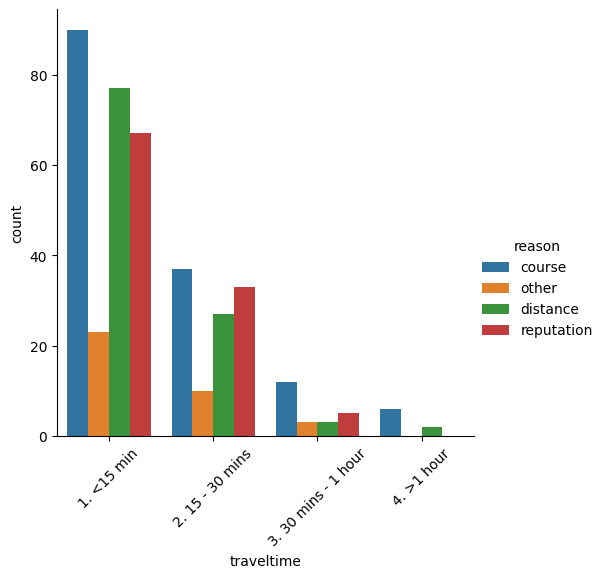

In [131]:
fig = sns.catplot(data=df.sort_values("traveltime"), x = "traveltime",  hue = "reason", kind='count')
fig.set_xticklabels(rotation = 45)

In [132]:
contigency_tbl = pd.crosstab(df['traveltime'], df['reason'])
print(contigency_tbl)

c, p, dof, expected = chi2_contingency(contigency_tbl)
print("p-value =", p)

reason               course  distance  other  reputation
traveltime                                              
1. <15 min               90        77     23          67
2. 15 - 30 mins          37        27     10          33
3. 30 mins - 1 hour      12         3      3           5
4. >1 hour                6         2      0           0
p-value = 0.22685085821004924


Dari eksplorasi tersebut dapat disimpulkan bahwa tidak ada korelasi yang kuat antara alasan memilih sekolah dengan waktu tempuh (p-value > 0.05). Hal menarik yang dapat bahwa mayoritas siswa memilih sekolah karena alasan mata pelajaran dibandingkan jarak dan reputasi untuk setiap kelompok jarak tempuh. Lalu ada siswa yang jarak tempuh ke sekolah lebih dari 1 jam namun tetap memilih sekolah tersebut dengan alasan jarak.
<!-- Asumsi rumahnya dipelosok dan ga ada sekolah lain yang lebih dekat -->

## RQ2 - Apakah ada hubungan antara umur dengan nilai UTS dan nilai UAS?

Perhatikan bahwa kedua variabel merupakan nilai numerik sehingga kita dapat menggunakan metode Pearson correlation coeffiecient.

In [133]:
print(pearsonr(df["midtermexam"], df["finalexam"]))

PearsonRResult(statistic=np.float64(0.8521180663648064), pvalue=np.float64(1.4413466854277973e-112))


In [134]:
1.4413466854277973e-112 < 0.05

True

Nilai sample's pearson coefficientnya adalah **0.85** dengan p-value < 0.05, artinya ada empirical support bahwa kita akan mendapatkan observasi serupa di populasi asli.

<Axes: xlabel='midtermexam', ylabel='finalexam'>

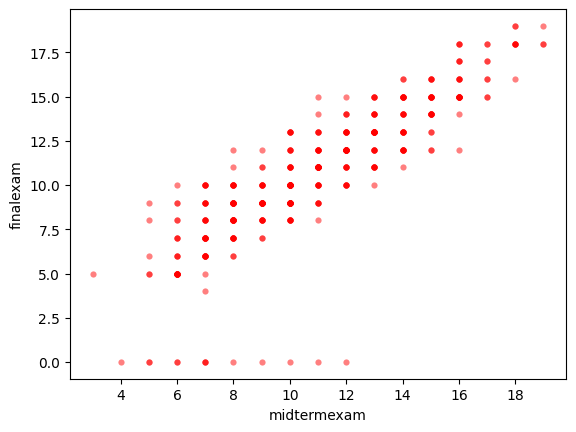

In [135]:
df.plot.scatter(x = 'midtermexam', y = 'finalexam', c = 'r', alpha = 0.5, linewidth = 0)

Siswa yang mendapatkan nilai lebih tinggi pada ujian tengah semester umumnya juga mendapatkan nilai yang lebih tinggi pada ujian akhir semester, dan sebaliknya. Sebaran titik-titik menunjukkan variasi, di mana tidak semua siswa dengan nilai tengah semester yang sama mendapatkan nilai akhir yang identik, namun tren umumnya adalah kenaikan bersamaan. Terdapat beberapa titik data yang menunjukkan nilai ujian akhir semester adalah nol meskipun memiliki nilai tengah semester yang bervariasi, yang mungkin menandakan kasus khusus seperti ketidakhadiran atau masalah lain pada ujian akhir bagi siswa-siswa tersebut.

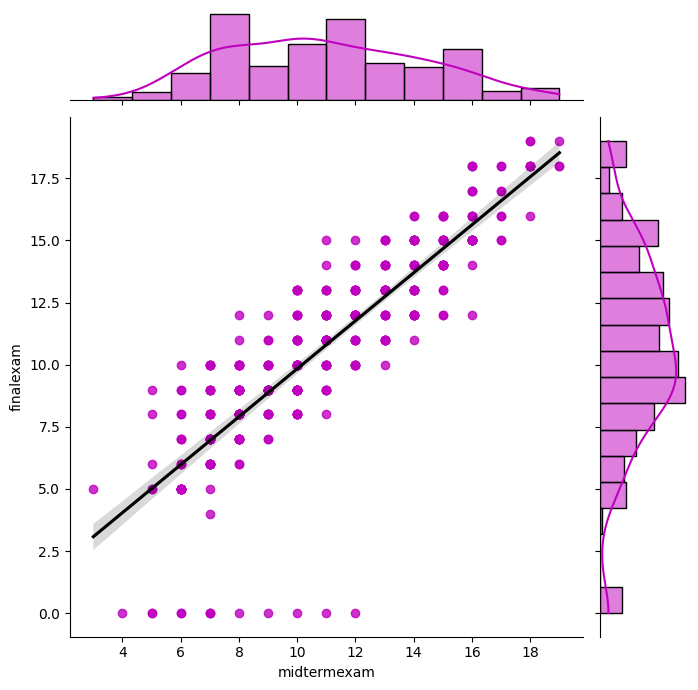

In [136]:
g = sns.jointplot(data = df, x = "midtermexam", y = "finalexam",

kind = "reg", color = "m", height = 7,
joint_kws = {'line_kws':{'color':'black'}})

Garis regresi linear yang ditarik menunjukkan dengan jelas adanya korelasi positif yang kuat antara nilai ujian tengah semester dan ujian akhir semester; semakin tinggi nilai tengah semester, semakin tinggi pula prediksi nilai ujian akhir semester.

Distribusi nilai ujian tengah semester tampak sedikit lebih merata dengan puncak di sekitar nilai tengah, sementara distribusi nilai ujian akhir semester juga menunjukkan sebaran yang luas namun dengan kecenderungan siswa mendapatkan nilai yang lebih tinggi.

Ada beberapa titik data dengan nilai ujian akhir nol meskipun nilai ujian tengah semester bervariasi juga terlihat konsisten di plot ini, menandakan perlunya investigasi lebih lanjut terhadap kasus-kasus tersebut.


## RQ3 - Seberapa besar effect size dari schoolsup, famsup, paid, activities, nursery, higher, internet, dan romantic terhadap nilai akhir?

Perhatikan bahwa kolum `schoolsup`, `famsup`, dan seterusnya hingga `romantic` memiliki nilai yang biner (hanya Yes atau No) sedangkan nilai akhir bertipe numerikal. Kita akan menghitung cohen's d tiap kolom terhadap nilai akhir.

Interpretasi effect size bisa dikategorikan ke 3 bagian: kecil (d = 0.2), medium (d = 0.5), dan besar (d = 0.8)

Cohen J. (1988). Statistical Power Analysis for the Behavioral Sciences. New York, NY: Routledge Academic

Bacaan lebih lanjut: https://pmc.ncbi.nlm.nih.gov/articles/PMC3840331/

In [137]:
# definisi cohen's d
def cohen_d(group1, group2):
    mean1, mean2 = np.mean(group1), np.mean(group2)
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    n1, n2 = len(group1), len(group2)

    if n1 < 2 or n2 < 2:
        return np.nan

    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

    if pooled_std == 0:
        return np.nan

    return (mean1 - mean2) / pooled_std

# kolom yang kita perlukan
binary_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
target_col = 'finalgrade'

In [138]:
# menghitung cohen's d tiap kolom terhadap target
effect_sizes = {}

for col in binary_cols:
    group_yes = df[df[col] == 'yes'][target_col]
    group_no = df[df[col] == 'no'][target_col]

    # Pastikan kedua grup memiliki data
    if not group_yes.empty and not group_no.empty:
        d = cohen_d(group_yes, group_no)
        effect_sizes[col] = d
    else:
        effect_sizes[col] = np.nan

In [139]:
# mencetak nilai cohen's d terhadap nilai akhir
for var, d_value in effect_sizes.items():
    if pd.isna(d_value):
        print(f"{var}: Tidak dapat dihitung (mungkin salah satu grup kosong atau varians nol)")
    else:
        print(f"{var}: {d_value:.4f}")

schoolsup: -0.2471
famsup: -0.0802
paid: 0.2053
activities: 0.0321
nursery: 0.1276
higher: 0.8443
internet: 0.2646
romantic: -0.2772


Beberapa temuan menarik:

- `higher`: 0.8443 artinya siswa yang berniat untuk melanjutkan ke pendidikan tinggi (higher='yes') memiliki rata-rata finalgrade yang secara substansial lebih tinggi (sekitar 0.84 standar deviasi) dibandingkan siswa yang tidak berniat. Ini adalah faktor dengan pengaruh paling kuat di antara yang diukur.

- `romantic`: -0.2772 artinya siswa yang sedang dalam hubungan romantis (romantic='yes') cenderung memiliki rata-rata finalgrade yang lebih rendah (sekitar 0.28 standar deviasi) dibandingkan yang tidak.

- `paid`: 0.2053 artinya siswa yang mengikuti kelas tambahan berbayar (paid='yes') cenderung memiliki rata-rata finalgrade yang sedikit lebih tinggi (sekitar 0.21 standar deviasi) dibandingkan yang tidak.

Visualisasi untuk effect size paling tinggi, kolom`higher`:

<ipython-input-140-de6262ada8f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='higher', y='finalgrade', data=df, palette={'yes':'skyblue', 'no':'lightcoral'}, inner='box')


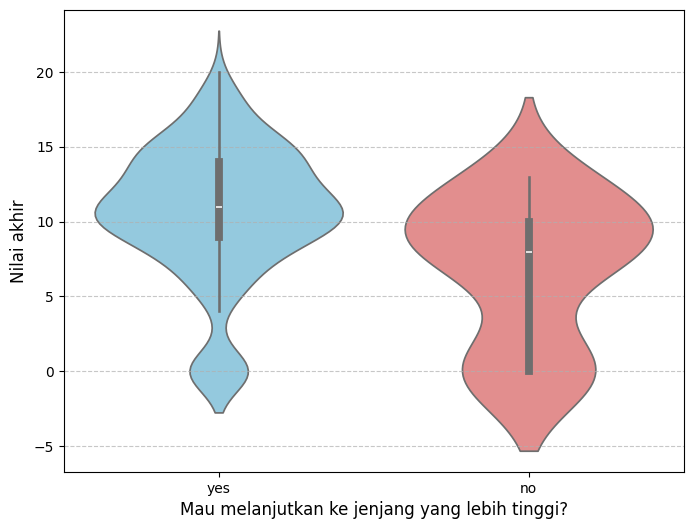

In [140]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='higher', y='finalgrade', data=df, palette={'yes':'skyblue', 'no':'lightcoral'}, inner='box')
plt.xlabel('Mau melanjutkan ke jenjang yang lebih tinggi?', fontsize=12)
plt.ylabel('Nilai akhir', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Siswa yang berniat melanjutkan pendidikan cenderung memiliki nilai akhir yang secara umum lebih tinggi, dengan median yang lebih tinggi dan konsentrasi nilai yang lebih besar di rentang atas. Sebaliknya, siswa yang tidak berniat melanjutkan pendidikan cenderung memiliki nilai akhir yang lebih rendah.

## RQ4 - Apakah ada hubungan antara konsumsi alkohol dengan nilai akhir?

<ipython-input-141-8e3676911d09>:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(values, labels = labels, showfliers = False)


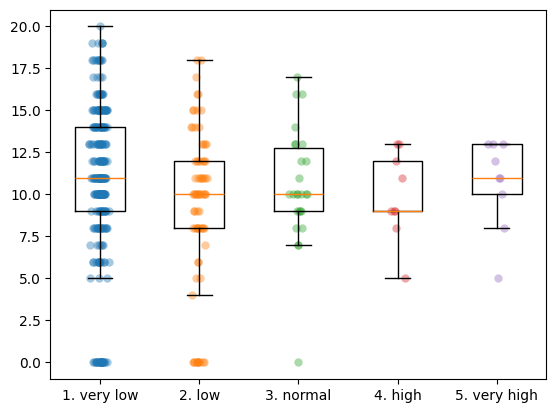

In [141]:
fig, ax = plt.subplots()

values, labels, jitters = [], [], []

grouped = df.groupby("Dalc")

position = 1
for key, group in grouped:
  values.append(group["finalgrade"].values)
  labels.append(key)
  jitters.append(np.random.normal(position, 0.04, group["finalgrade"].values.shape[0]))
  position += 1

# gambar boxplot
ax.boxplot(values, labels = labels, showfliers = False)

# gambar scatter plot di area boxplot, dengan jitter
for x, val in zip(jitters, values):
  ax.scatter(x, val, alpha = 0.4, linewidth=0)

plt.show()

Visualisasi ini mengindikasikan bahwa konsumsi alkohol yang lebih tinggi selama hari kerja cenderung berkaitan dengan nilai akhir yang lebih rendah.

Kelompok siswa dengan konsumsi alkohol `very low` menunjukkan median nilai akhir yang paling tinggi di antara semua kelompok, dengan sebaran nilai yang juga cukup luas namun cenderung terkonsentrasi di bagian atas.

Pada kelompok siswa dengan konsumsi alkohol `low` dan ` normal`, median nilai akhir tampak sedikit menurun, meskipun masih ada variasi yang cukup besar dalam nilai siswa.

<ipython-input-142-5b55086b54e0>:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(values, labels = labels, showfliers = False)


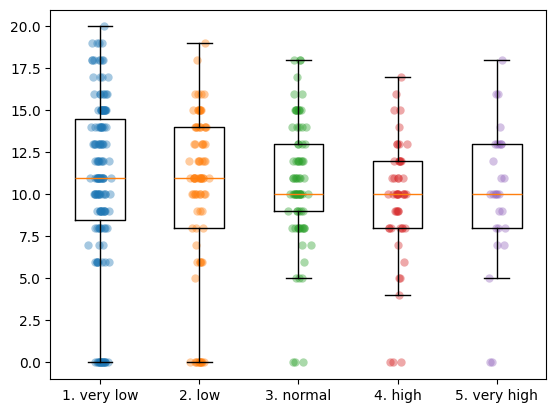

In [142]:
fig, ax = plt.subplots()

values, labels, jitters = [], [], []

grouped = df.groupby("Walc")

position = 1
for key, group in grouped:
  values.append(group["finalgrade"].values)
  labels.append(key)
  jitters.append(np.random.normal(position, 0.04, group["finalgrade"].values.shape[0]))
  position += 1

# gambar boxplot
ax.boxplot(values, labels = labels, showfliers = False)

# gambar scatter plot di area boxplot, dengan jitter
for x, val in zip(jitters, values):
  ax.scatter(x, val, alpha = 0.4, linewidth=0)

plt.show()

Secara keseluruhan, boxplot untuk konsumsi alkohol di akhir pekan juga mengindikasikan adanya hubungan negatif antara tingkat konsumsi alkohol di hari libur dan nilai akhir, di mana konsumsi yang lebih tinggi cenderung diasosiasikan dengan pencapaian akademik yang lebih rendah. Polanya mirip dengan konsumsi di hari kerja, meskipun perbandingan langsung penurunan median antar level mungkin memiliki sedikit perbedaan.

## RQ5 - Apakah ada kaitan antara waktu belajar dengan hubungan romantis?

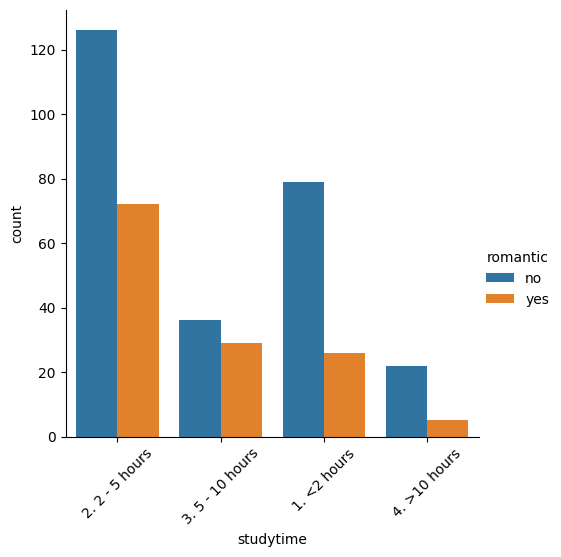

In [143]:
# kaitan antara xx danc yy secara visual
g = sns.catplot(x = "studytime", data = df, \
kind = "count", hue = 'romantic')

# agar tidak overlap, label pada posisi x dirotasi
g.set_xticklabels(rotation = 45)
plt.show()

Individu yang tidak memiliki hubungan romantis cenderung memiliki jumlah yang lebih tinggi di sebagian besar kategori waktu belajar dibandingkan dengan mereka yang memiliki hubungan romantis.

## RQ 6 - GP vs MS: Nilai, jumlah mata pelajaran yang diulang, dan absensi

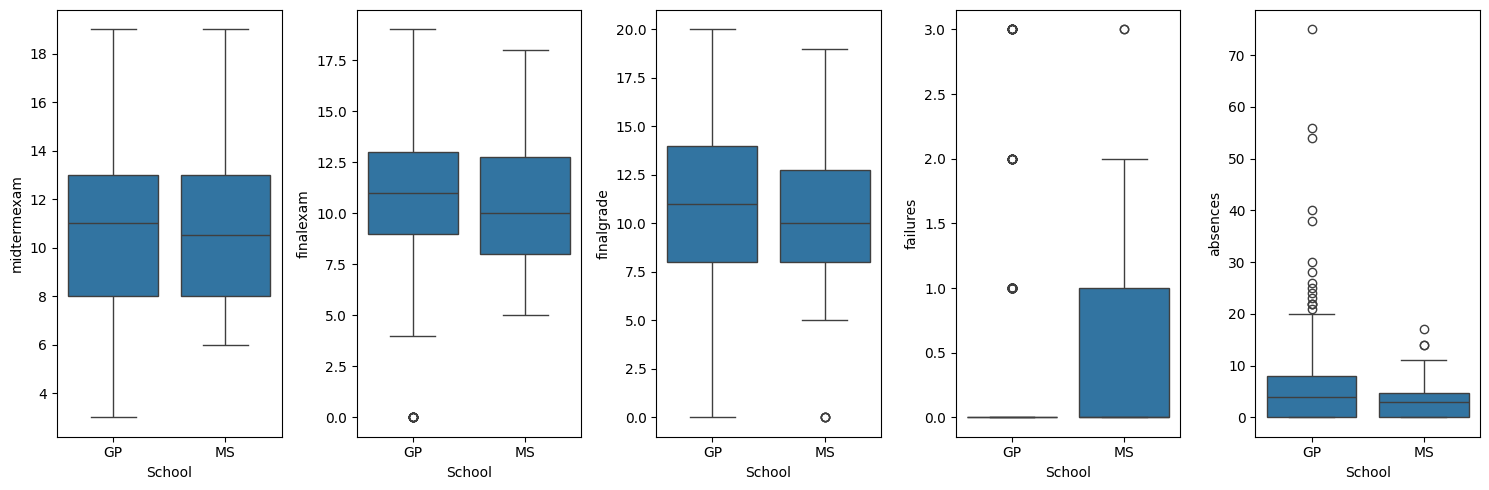

In [144]:
columns_to_compare = ['midtermexam', 'finalexam', 'finalgrade', 'failures', 'absences']
schools = df['school'].unique()

# Visualisasi
n_cols = len(columns_to_compare)
plt.figure(figsize=(15, 5))
for i, col in enumerate(columns_to_compare):
    plt.subplot(1, n_cols, i + 1)
    sns.boxplot(data=df, x='school', y=col)
    plt.xlabel('School')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Sekolah MS sedikit lebih unggul di aspek nilai dan kehadiran, tapi sedikit lebih banyak siswanya yang pernah gagal pada satu mapel. Sementara itu, sekolah GP perlu sedikit perhatian lebih di kehadiran beberapa siswanya.